## Analyse des Données de Santé Publique

Importation des bibliothèques 

In [190]:
import pandas as pd
import numpy as np

Charger le jeu de données à l’aide de Pandas.

In [191]:
db=pd.read_csv('DataSet.csv')

Afficher la taille (dimensions) du dataset (lignes, colonnes).

In [192]:
print("La taille du dataset est de", db.shape[0], "lignes et", db.shape[1], "colonnes.")

La taille du dataset est de 5735 lignes et 28 colonnes.


Lister les colonnes disponibles dans le dataset.

In [193]:
print("les colonnes disponibles sont :",db.columns.tolist())

les colonnes disponibles sont : ['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR', 'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR', 'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2', 'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'HIQ210']


Créer un sous-ensemble du jeu de données contenant uniquement les colonnes suivantes :

Brève explication des colonnes :

SEQN : Numéro de séquence du répondant

SMQ020 : Tabagisme

RIAGENDR : Sexe

RIDAGEYR : Âge (en années)

DMDEDUC2 : Niveau d'éducation

BMXWT : Poids (en kg)

BMXHT : Taille (en cm)

BMXBMI : IMC (Indice de Masse Corporelle)

In [194]:
db_sous=db[['SEQN','SMQ020', 'RIAGENDR', 'RIDAGEYR','DMDEDUC2','BMXWT', 'BMXHT', 'BMXBMI']]

Afficher les informations générales (.info()) sur ce sous-ensemble.

In [195]:
print("Les informations générales sur le sous dataset sont:", db_sous.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      5735 non-null   int64  
 1   SMQ020    5735 non-null   int64  
 2   RIAGENDR  5735 non-null   int64  
 3   RIDAGEYR  5735 non-null   int64  
 4   DMDEDUC2  5474 non-null   float64
 5   BMXWT     5666 non-null   float64
 6   BMXHT     5673 non-null   float64
 7   BMXBMI    5662 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 358.6 KB
Les informations générales sur le sous dataset sont: None


Renommer les colonnes avec des noms plus explicites :
['seqn','smoking','gender', 'age','education','weight','height','bmi'].

In [196]:
db_sous=db_sous.rename(columns={ 'SEQN':'seqn', 'SMQ020':'smoking', 'RIAGENDR':'gender' ,'RIDAGEYR':'age','DMDEDUC2':'education', 'BMXWT':'weight','BMXHT':'height','BMXBMI':'bmi'} )
print(db_sous.columns)
colonnes_numeriques = ['education', 'weight', 'height', 'bmi']
for col in colonnes_numeriques:
    db_sous[col] = pd.to_numeric(db_sous[col], errors='coerce')


print(db_sous.info())

Index(['seqn', 'smoking', 'gender', 'age', 'education', 'weight', 'height',
       'bmi'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5735 entries, 0 to 5734
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   seqn       5735 non-null   int64  
 1   smoking    5735 non-null   int64  
 2   gender     5735 non-null   int64  
 3   age        5735 non-null   int64  
 4   education  5474 non-null   float64
 5   weight     5666 non-null   float64
 6   height     5673 non-null   float64
 7   bmi        5662 non-null   float64
dtypes: float64(4), int64(4)
memory usage: 358.6 KB
None


Vérifier la présence de doublons dans le dataset.



In [197]:
print("Il ya des doublons dans le data set", db_sous.duplicated().sum())

Il ya des doublons dans le data set 0


Supprimer les doublons si nécessaire.

____________________ Il n ya pas des doublons _____________________

Supprimer la colonne 'seqn', considérée comme un identifiant inutile pour l’analyse.

In [198]:
db_sous=db_sous.drop(columns='seqn')
print(db_sous.columns.to_list())

['smoking', 'gender', 'age', 'education', 'weight', 'height', 'bmi']


Identifier les valeurs manquantes (NaN) dans les colonnes.

In [199]:
print("Les valeurs manquantes dans chaque colonnes sont:")
print(db_sous.isnull().sum())

Les valeurs manquantes dans chaque colonnes sont:
smoking        0
gender         0
age            0
education    261
weight        69
height        62
bmi           73
dtype: int64


Remplacer les valeurs manquantes :

education : remplacer par la médiane

weight, height, bmi : remplacer par la moyenne

In [200]:
print(db_sous.education.dtype)

float64


In [201]:
db_sous.education=db_sous.education.fillna(db_sous.education.median())
db_sous.weight=db_sous.weight.fillna(db_sous.weight.mean())
db_sous.height=db_sous.height.fillna(db_sous.height.mean())
db_sous.bmi=db_sous.bmi.fillna(db_sous.bmi.mean())
print(db_sous.isnull().sum())


smoking      0
gender       0
age          0
education    0
weight       0
height       0
bmi          0
dtype: int64


Afficher les statistiques descriptives (moyenne, écart-type, min, max, etc.) du dataset.

In [202]:
print("Les statistiques descriptives sont:")
print(db_sous.describe())


Les statistiques descriptives sont:
           smoking       gender          age    education       weight  \
count  5735.000000  5735.000000  5735.000000  5735.000000  5735.000000   
mean      1.607149     1.518919    48.052310     3.467132    81.342676   
std       0.571975     0.499686    18.431011     1.284826    21.633062   
min       1.000000     1.000000    18.000000     1.000000    32.400000   
25%       1.000000     1.000000    32.000000     3.000000    66.100000   
50%       2.000000     2.000000    48.000000     4.000000    78.400000   
75%       2.000000     2.000000    63.000000     4.000000    92.600000   
max       9.000000     2.000000    80.000000     9.000000   198.900000   

            height          bmi  
count  5735.000000  5735.000000  
mean    166.142834    29.382197  
std      10.024624     7.050607  
min     129.700000    14.500000  
25%     158.750000    24.400000  
50%     166.142834    28.400000  
75%     173.400000    33.000000  
max     202.700000    67.

Détecter les valeurs aberrantes (outliers) à l’aide de méthodes statistiques.

In [203]:
data_filt=pd.DataFrame()
def outl(data):
    for col in data.columns:
        Q1=data[col].quantile(0.25)
        Q3=data[col].quantile(0.75)
        IQR=Q3-Q1
        data_non_filered=data[(data[col]<= Q1-1.5*IQR) | (data[col]>= Q3+1.5*IQR)]
        print(f"Pour la colonne {col}, on a l'IQR est:")
        print(f"IQR,{IQR}")
        if data_non_filered.empty :
           print(f"Data frame vide, ie: il n'ya pas de valeurs abérrantes dans la colonne {col}")
        else:
          print("Et le data frame contenant les valeurs non abérrantes est:")
          print(data_non_filered)

print(outl(db_sous))



Pour la colonne smoking, on a l'IQR est:
IQR,1.0
Et le data frame contenant les valeurs non abérrantes est:
      smoking  gender  age  education  weight  height   bmi
288         7       1   36        1.0    61.9   173.7  20.5
1331        9       1   80        9.0    79.1   164.8  29.1
1433        9       2   73        5.0   102.0   168.7  35.8
1636        7       1   64        4.0   118.4   172.9  39.6
1756        9       1   80        1.0    97.8   174.2  32.2
2818        9       2   24        3.0    67.1   159.6  26.3
4835        9       2   60        3.0    65.2   156.2  26.7
4964        9       1   80        9.0    97.6   169.6  33.9
5270        9       1   78        2.0    70.7   163.1  26.6
5324        9       2   38        4.0    43.4   146.1  20.3
Pour la colonne gender, on a l'IQR est:
IQR,1.0
Data frame vide, ie: il n'ya pas de valeurs abérrantes dans la colonne gender
Pour la colonne age, on a l'IQR est:
IQR,31.0
Data frame vide, ie: il n'ya pas de valeurs abérrantes dans 

Pour la colonne height, on a l'IQR est:
IQR,14.650000000000006
Et le data frame contenant les valeurs non abérrantes est:
      smoking  gender  age  education  weight  height   bmi
471         1       1   29        3.0   121.2   198.4  30.8
1591        2       2   75        1.0    51.4   129.7  30.6
1627        1       1   43        4.0   120.6   201.0  29.9
2500        2       1   41        5.0   122.6   202.7  29.8
2860        1       1   48        5.0   103.5   195.6  27.1
4100        2       1   65        5.0   110.4   195.4  28.9
5729        2       1   25        5.0    39.2   136.5  21.0
Pour la colonne bmi, on a l'IQR est:
IQR,8.600000000000001
Et le data frame contenant les valeurs non abérrantes est:
      smoking  gender  age  education  weight  height   bmi
128         2       2   22        4.0   126.3   162.9  47.6
131         2       2   44        4.0   147.0   167.9  52.1
150         2       2   41        3.0   121.9   156.4  49.8
170         2       2   60        4.0   

Supprimer les outliers pour améliorer la qualité des données.

In [204]:
def supprimer_outliers(data):
    df = data.copy()
    cola=['smoking', 'gender', 'age', 'education', 'weight', 'height', 'bmi']
    for col in cola:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        borne_inf = Q1 - 1.5 * IQR
        borne_sup = Q3 + 1.5 * IQR

        # Supprimer les lignes où il y a un outlier dans la colonne
        df = df[(df[col] >= borne_inf) & (df[col] <= borne_sup)]
    return df
df_clean = supprimer_outliers(db_sous)
print(db_sous)




      smoking  gender  age  education  weight  height   bmi
0           1       1   62        5.0    94.8   184.5  27.8
1           1       1   53        3.0    90.4   171.4  30.8
2           1       1   78        3.0    83.4   170.1  28.8
3           2       2   56        5.0   109.8   160.9  42.4
4           2       2   42        4.0    55.2   164.9  20.3
...       ...     ...  ...        ...     ...     ...   ...
5730        1       2   76        3.0    59.1   165.8  21.5
5731        2       1   26        5.0   112.1   182.2  33.8
5732        1       2   80        4.0    71.7   152.2  31.0
5733        1       1   35        1.0    78.2   173.3  26.0
5734        2       2   24        5.0    58.3   165.0  21.4

[5735 rows x 7 columns]


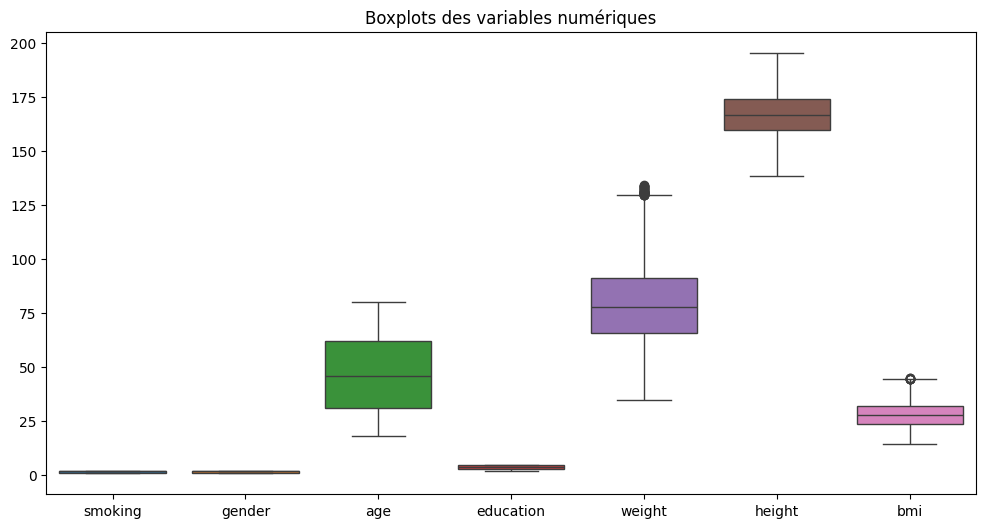

In [205]:
import matplotlib.pyplot as plt
import seaborn as sns
colonnes = ['smoking', 'gender', 'age', 'education', 'weight', 'height', 'bmi']

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_sans_outliers)
plt.title('Boxplots des variables numériques')
plt.show()

In [206]:
data_filt=pd.DataFrame()
def outl(data):
    for col in data.columns:
        Q1=data[col].quantile(0.25)
        Q3=data[col].quantile(0.75)
        IQR=Q3-Q1
        data_non_filered=data[(data[col]<= Q1-1.5*IQR) | (data[col]>= Q3+1.5*IQR)]
        print(f"Pour la colonne {col}, on a l'IQR est:")
        print(f"IQR,{IQR}")
        if data_non_filered.empty :
           print(f"Data frame vide, ie: il n'ya pas de valeurs abérrantes dans la colonne {col}")
        else:
          print("Et le data frame contenant les valeurs abérrantes est:")
          print(data_non_filered)

print(outl(df_clean))



Pour la colonne smoking, on a l'IQR est:
IQR,1.0
Data frame vide, ie: il n'ya pas de valeurs abérrantes dans la colonne smoking
Pour la colonne gender, on a l'IQR est:
IQR,1.0
Data frame vide, ie: il n'ya pas de valeurs abérrantes dans la colonne gender
Pour la colonne age, on a l'IQR est:
IQR,31.0
Data frame vide, ie: il n'ya pas de valeurs abérrantes dans la colonne age
Pour la colonne education, on a l'IQR est:
IQR,2.0
Data frame vide, ie: il n'ya pas de valeurs abérrantes dans la colonne education
Pour la colonne weight, on a l'IQR est:
IQR,25.5
Et le data frame contenant les valeurs abérrantes est:
      smoking  gender  age  education  weight  height   bmi
233         1       1   38        2.0   131.6   179.0  41.1
698         2       2   43        5.0   130.9   174.5  43.0
722         1       1   48        4.0   129.6   183.6  38.4
817         1       1   45        3.0   131.2   177.8  41.5
1217        2       1   57        2.0   129.8   188.0  36.7
1478        1       1   34   

In [207]:
print("Nombre de lignes avant :", db_sous.shape[0])
print("Nombre de lignes après :", df_clean.shape[0])

Nombre de lignes avant : 5735
Nombre de lignes après : 4844
